In [6]:
#%%IMPORTS
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten,Input, Lambda, ReLU
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import numpy as np
import tensorflow as tf
import pandas as pd


In [2]:
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten,Input, Lambda, ReLU
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import numpy as np
import tensorflow as tf
import pandas as pd

train, test = mnist.load_data()
X_train, y_train = train[0], train[1]
X_test, y_test = test[0], test[1]
X_train = np.expand_dims(X_train,axis=-1)
X_test = np.expand_dims(X_test,axis=-1)

class_num = np.unique(y_train).shape[0]

y_train = pd.get_dummies(pd.Categorical(y_train)).values
y_test = pd.get_dummies(pd.Categorical(y_test)).values

def SquaredReLU(tensor):
    return tf.math.pow(ReLU()(tensor),2)

model = Sequential()
model.add(Conv2D(input_shape=(X_train.shape[1:]),filters=6,kernel_size=(5,5),activation=Lambda(SquaredReLU)))
model.add(AveragePooling2D())
model.add(Conv2D(input_shape=(X_train.shape[1:]),filters=16,kernel_size=(5,5),activation='relu'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(Dense(84,activation='relu'))
model.add(Dense(class_num,activation='softmax'))

model.compile(loss='categorical_crossentropy',metrics='accuracy',optimizer='adam')
plot_model(model,show_shapes=True)

model.fit(x = X_train, y=y_train, epochs=10, validation_data=(X_test,y_test))

history = model.history.history

train_loss = history['loss'][-1]
test_loss = history['val_loss'][-1]
train_acc = history['accuracy'][-1]
test_acc = history['val_accuracy'][-1]

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 20s 7ms/step - loss: 6.9975 - accuracy: 0.8647 - val_loss: 0.4018 - val_accuracy: 0.9255
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2313 - accuracy: 0.9458 - val_loss: 0.1707 - val_accuracy: 0.9563
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1320 - accuracy: 0.9628 - val_loss: 0.1700 - val_accuracy: 0.9547
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0970 - accuracy: 0.9715 - val_loss: 0.0973 - val_accuracy: 0.9716
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0807 - accuracy: 0.9761 - val_loss: 0.0861 - val_accuracy: 0.9740
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0719 - accuracy: 0.9777 - val_loss: 0.0663 - val_accuracy: 0.9788
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/s

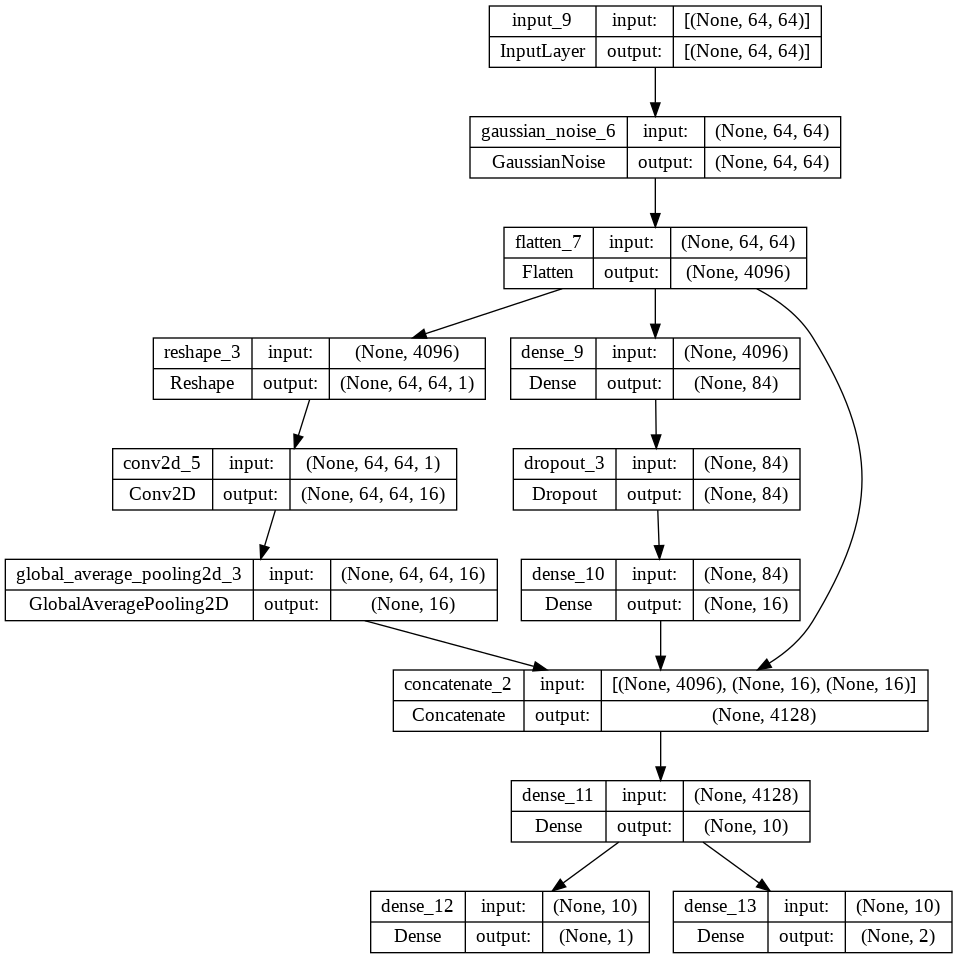

In [24]:
from keras.utils.vis_utils import plot_model
from keras.layers import GaussianNoise, Reshape, GlobalAveragePooling2D, Dropout, concatenate

train, test = mnist.load_data()
X_train, y_train = train[0], train[1]
X_test, y_test = test[0], test[1]

class_num = np.unique(y_train).shape[0]

y_train = pd.get_dummies(pd.Categorical(y_train)).values

output_tensor = input_tensor = Input((64,64))
output_tensor = GaussianNoise(0.1)(output_tensor)
output_tensor = Flatten()(output_tensor)

tensors_to_concat = [output_tensor]

paths = [
    [
        Reshape((64,64,1)),
        Conv2D(filters=16,kernel_size=(1,1)), #Verify
        GlobalAveragePooling2D()
    ],
    [
        Dense(84,activation='relu'),
        Dropout(0.5),
        Dense(16)
    ]
]

for path in paths:
  temp_tensor = output_tensor
  for layer in path:
    temp_tensor = layer(temp_tensor)
  tensors_to_concat.append(temp_tensor)

output_tensor = concatenate(tensors_to_concat)
output_tensor = Dense(10)(output_tensor)
output_tensors = [Dense(1)(output_tensor),Dense(2)(output_tensor)]

model = Model(input_tensor,output_tensors)



model.compile()
plot_model(model,show_shapes = True)



Epoch 1/5


<ipython-input-34-696bd69e370d>:32: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_clasifier = KerasClassifier(buildModel)


1500/1500 [==============================] - 11s 7ms/step - loss: 1.4030 - accuracy: 0.8718
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1809 - accuracy: 0.9498
Epoch 3/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1166 - accuracy: 0.9646
Epoch 4/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0959 - accuracy: 0.9704
Epoch 5/5
375/375 [==============================] - 3s 7ms/step - loss: 0.1102 - accuracy: 0.9680
Epoch 1/5
1500/1500 [==============================] - 11s 7ms/step - loss: 1.3713 - accuracy: 0.8722
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1588 - accuracy: 0.9549
Epoch 3/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1060 - accuracy: 0.9679
Epoch 4/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0859 - accuracy: 0.9734
Epoch 5/5
375/375 [==============================] - 3s 8ms/step - loss: 0.0789 - accuracy: 0.

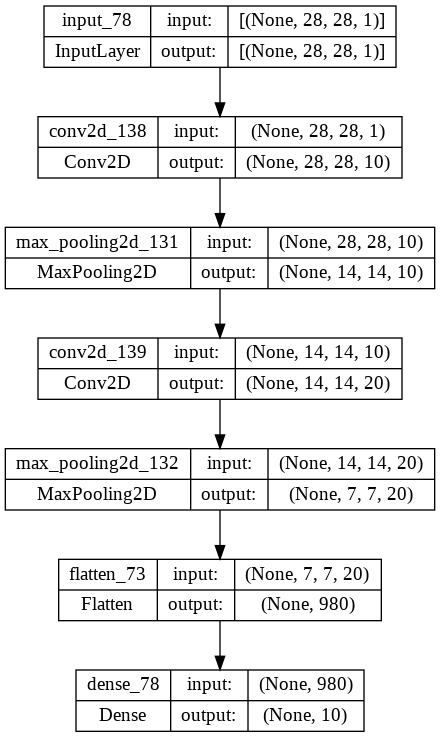

In [34]:
from keras.layers import MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

train, test = mnist.load_data()
X_train, y_train = train[0], train[1]
X_test, y_test = test[0], test[1]
X_train = np.expand_dims(X_train,axis=-1)
X_test = np.expand_dims(X_test,axis=-1)

class_num = np.unique(y_train).shape[0]


def buildModel(filter_num,kernel_size):
  model = Sequential()
  model.add(Input(X_train.shape[1:]))
  model.add(Conv2D(activation='relu',padding='same',filters=filter_num,kernel_size=kernel_size))
  model.add(MaxPooling2D())
  model.add(Conv2D(activation='relu',padding='same',filters=filter_num*2,kernel_size=kernel_size))
  model.add(MaxPooling2D())
  model.add(Flatten())
  model.add(Dense(class_num,activation='softmax'))
  model.compile(loss="SparseCategoricalCrossentropy",optimizer=Adam(),metrics='accuracy')

  return model

values = {
    "filter_num": [6,10],
    "kernel_size": [(2,2),(4,4)],
}

keras_clasifier = KerasClassifier(buildModel)
grid_search = GridSearchCV(keras_clasifier,values)
grid_search.fit(X_train,y_train,epochs=5)

best_params = grid_search.best_params_

model = buildModel(**best_params)
plot_model(model,show_shapes=True)